# Lab Task 3

**Name**: Tazmeen Afroz  
**Roll No**: 22p-9252  
**Section**: BAI-5A  

---

## Task:  
Download a dataset and implement the following steps:

#### 1. Get basic insights on the dataset including its features.

#### 2. Visualize the dataset and overall data distribution.

#### 3. Clean the data using different cleaning techniques.

#### 4. Transform the data using different transformation techniques and justify why you chose the technique.

#### Basic Insights

In [36]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('Placement_data_full_class.csv')
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
201,202,M,54.20,Central,63.00,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,NaN
145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
203,204,M,55.68,Others,61.33,Others,Commerce,56.87,Comm&Mgmt,No,66.00,Mkt&HR,58.30,Placed,260000.0
13,14,F,77.00,Central,87.00,Central,Commerce,59.00,Comm&Mgmt,No,68.00,Mkt&Fin,68.63,Placed,218000.0
34,35,M,62.00,Others,51.00,Others,Science,52.00,Others,No,68.44,Mkt&HR,62.77,Not Placed,NaN


| Column          | Description                                                                     |
|-----------------|---------------------------------------------------------------------------------|
| **sl_no**       | Serial number, a unique identifier for each record.                             |
| **gender**      | Gender of the candidate (M = Male, F = Female).                                 |
| **ssc_p**       | Secondary Education percentage (10th Grade exam result).                        |
| **ssc_b**       | Board of Education for secondary schooling (e.g., Central, Others).             |
| **hsc_p**       | Higher Secondary Education percentage (12th Grade exam result).                 |
| **hsc_b**       | Board of Education for higher secondary schooling (e.g., Central, Others).      |
| **hsc_s**       | Specialization in higher secondary education (e.g., Science, Commerce, Arts).   |
| **degree_p**    | Percentage in undergraduate degree.                                             |
| **degree_t**    | Type of undergraduate degree (e.g., Sci&Tech = Science and Technology, Comm&Mgmt = Commerce and Management). |
| **workex**      | Work experience (Yes/No).                                                       |
| **etest_p**     | E-test (employability test) percentage.                                         |
| **specialisation** | MBA specialization (e.g., Mkt&HR = Marketing and Human Resources, Mkt&Fin = Marketing and Finance). |
| **mba_p**       | Percentage in MBA program.                                                      |
| **status**      | Placement status (Placed/Not Placed).                                           |
| **salary**      | Salary offered (in currency units).                                             |


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [38]:
df.describe(include="all").T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sl_no,215.0,NaN,NaN,NaN,108.0,62.209324,1.0,54.5,108.0,161.5,215.0
gender,215,2,M,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ssc_p,215.0,NaN,NaN,NaN,67.303395,10.827205,40.89,60.6,67.0,75.7,89.4
ssc_b,215,2,Central,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_p,215.0,NaN,NaN,NaN,66.333163,10.897509,37.0,60.9,65.0,73.0,97.7
hsc_b,215,2,Others,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hsc_s,215,3,Commerce,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
degree_p,215.0,NaN,NaN,NaN,66.370186,7.358743,50.0,61.0,66.0,72.0,91.0
degree_t,215,3,Comm&Mgmt,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workex,215,2,No,141,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Numerical and Categorical Variables

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()                           
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)


Numerical variables: ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
Categorical variables: ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']


In [40]:
# Count the number of categorical and numerical variables

categorical_count = df.select_dtypes(include='object').shape[1]
numerical_count = df.select_dtypes(exclude='object').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 8
Number of numerical variables: 7


#### Visualization

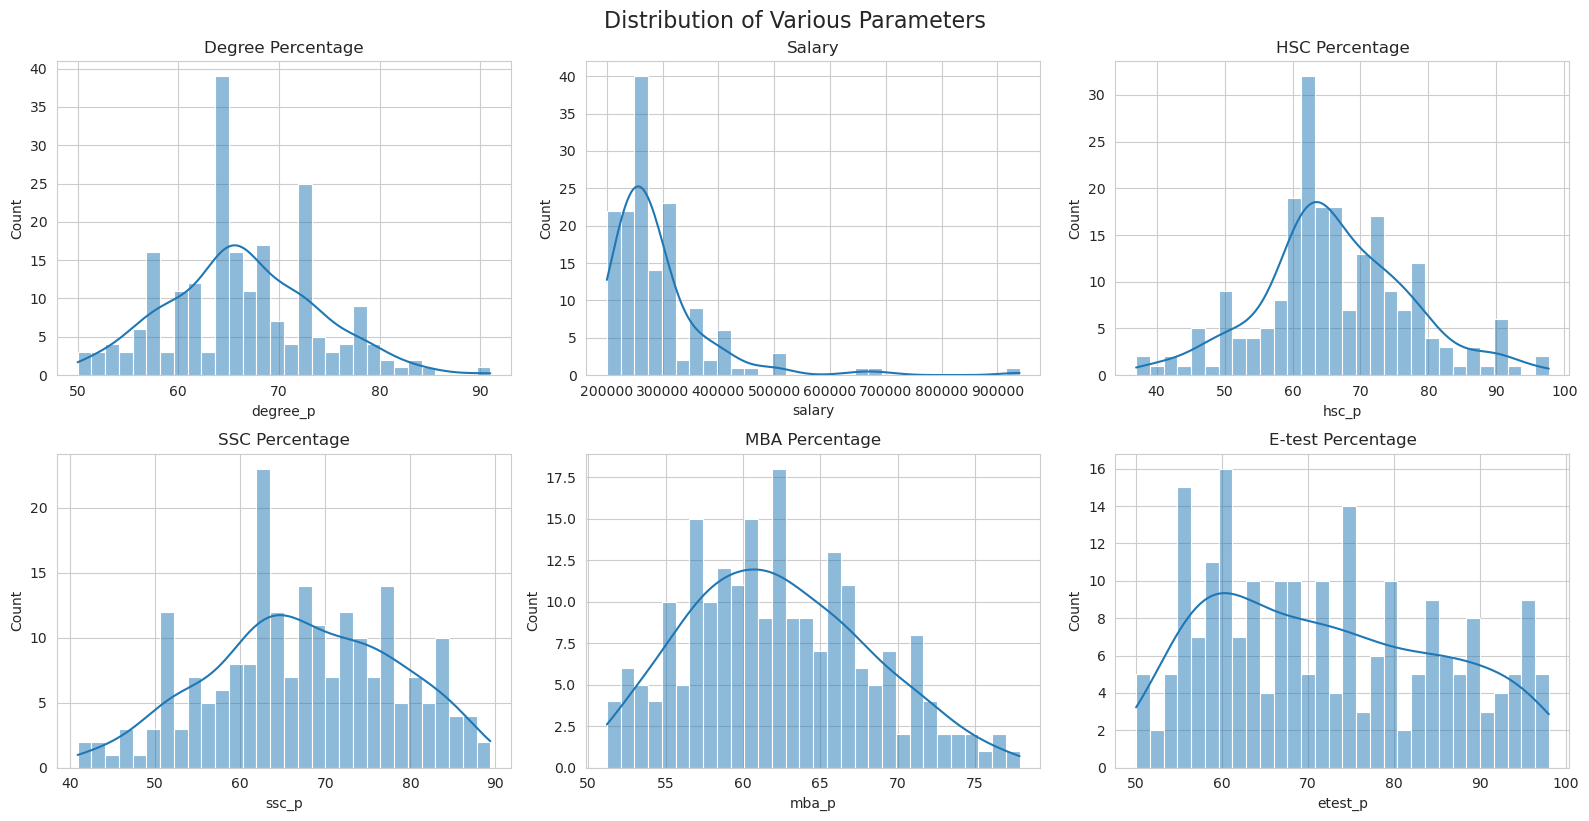

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the entire plot
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(16, 8))

# Subplot 1 - Degree Percentage
plt.subplot(2, 3, 1)
sns.histplot(df['degree_p'], bins=30, kde=True)
plt.title('Degree Percentage')

# Subplot 2 - Salary
plt.subplot(2, 3, 2)
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Salary')

# Subplot 3 - HSC Percentage
plt.subplot(2, 3, 3)
sns.histplot(df['hsc_p'], bins=30, kde=True)
plt.title('HSC Percentage')

# Subplot 4 - SSC Percentage
plt.subplot(2, 3, 4)
sns.histplot(df['ssc_p'], bins=30, kde=True)
plt.title('SSC Percentage')

# Subplot 5 - MBA Percentage
plt.subplot(2, 3, 5)
sns.histplot(df['mba_p'], bins=30, kde=True)
plt.title('MBA Percentage')

# Subplot 6 - E-test Percentage
plt.subplot(2, 3, 6)
sns.histplot(df['etest_p'], bins=30, kde=True)
plt.title('E-test Percentage')

# Show the plot
plt.tight_layout()
plt.suptitle('Distribution of Various Parameters', fontsize=16, y=1.02)
plt.show()



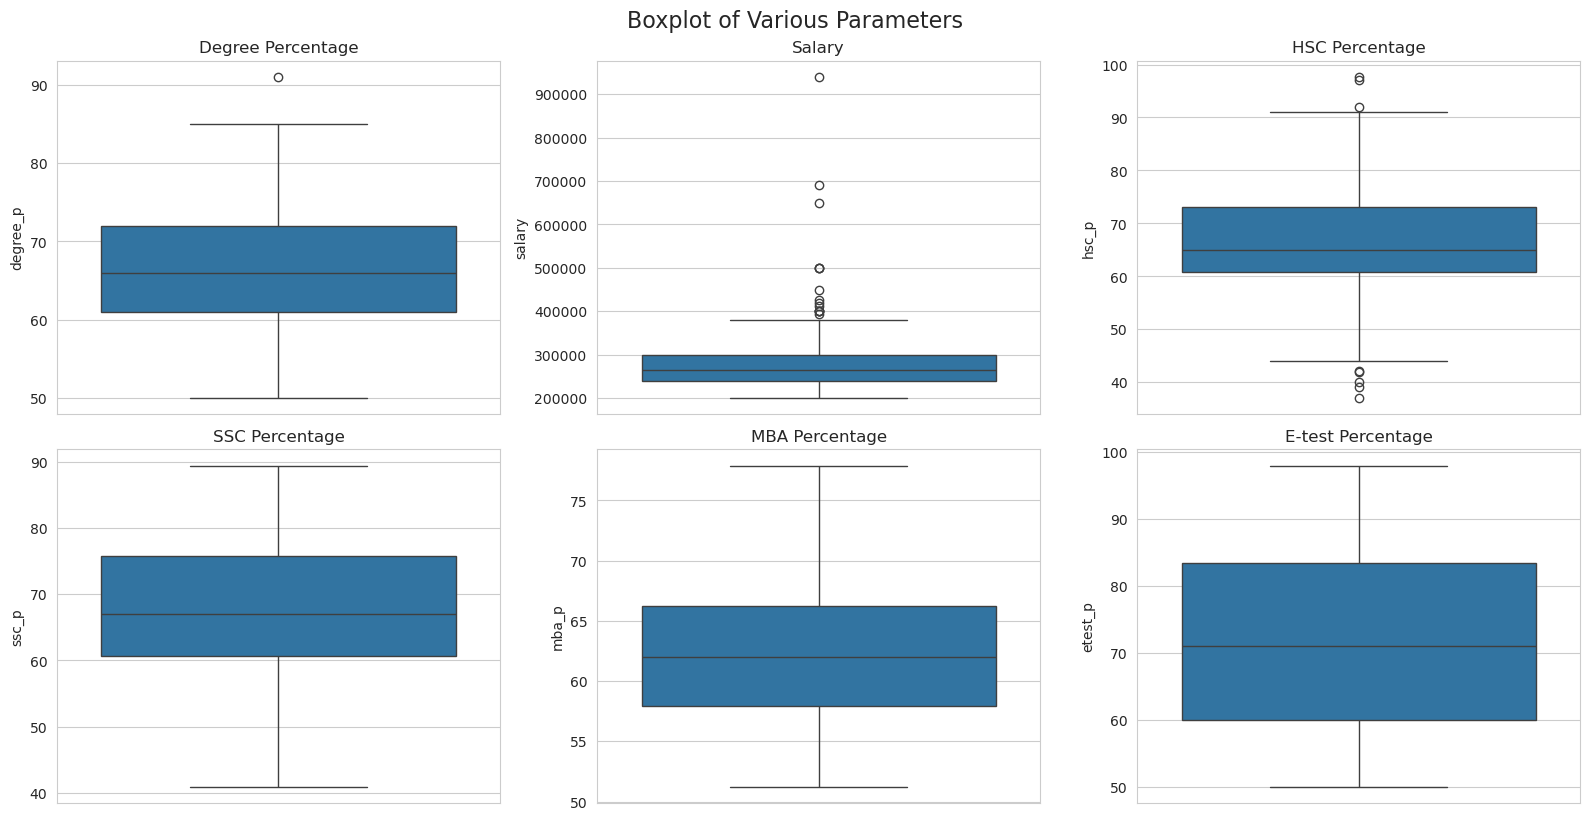

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the entire plot
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(16, 8))

# Subplot 1 - Degree Percentage
plt.subplot(2, 3, 1)
sns.boxplot(y=df['degree_p'])
plt.title('Degree Percentage')

# Subplot 2 - Salary
plt.subplot(2, 3, 2)
sns.boxplot(y=df['salary'])
plt.title('Salary')

# Subplot 3 - HSC Percentage
plt.subplot(2, 3, 3)
sns.boxplot(y=df['hsc_p'])
plt.title('HSC Percentage')

# Subplot 4 - SSC Percentage
plt.subplot(2, 3, 4)
sns.boxplot(y=df['ssc_p'])
plt.title('SSC Percentage')

# Subplot 5 - MBA Percentage
plt.subplot(2, 3, 5)
sns.boxplot(y=df['mba_p'])
plt.title('MBA Percentage')

# Subplot 6 - E-test Percentage
plt.subplot(2, 3, 6)
sns.boxplot(y=df['etest_p'])
plt.title('E-test Percentage')

# Show the plot
plt.tight_layout()
plt.suptitle('Boxplot of Various Parameters', fontsize=16, y=1.02)
plt.show()


#### Cleaning

In [43]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [44]:
# Count the number of duplicate rows in the data
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [45]:
# remove null values with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df['salary'] = imputer.fit_transform(df[['salary']])



In [46]:
# check the outliers in the following columns of the dataframe

from scipy import stats


z_scores_salary = stats.zscore(df['salary'])
z_scores_hsc = stats.zscore(df['hsc_p'])
z_scores_degree_p = stats.zscore(df['degree_p'])

z_threshold = 3


salary_outliers_z = df['salary'][(abs(z_scores_salary) > z_threshold)]
print("Z-score Salary outliers:")
print(salary_outliers_z)


hsc_outliers_z = df['hsc_p'][(abs(z_scores_hsc) > z_threshold)]
print("Z-score HSC outliers:")
print(hsc_outliers_z)


degree_p_outliers_z = df['degree_p'][(abs(z_scores_degree_p) > z_threshold)]
print("Z-score Degree Percentage outliers:")
print(degree_p_outliers_z)




Z-score Salary outliers:
119    940000.0
150    690000.0
177    650000.0
Name: salary, dtype: float64
Z-score HSC outliers:
Series([], Name: hsc_p, dtype: float64)
Z-score Degree Percentage outliers:
197    91.0
Name: degree_p, dtype: float64


In [47]:
# remove the outliers from the salary column 
df_cleaned = df[(abs(z_scores_salary) <= z_threshold)]

# trim the outliers from the  degree_p column
degree_p_max = df_cleaned['degree_p'].max()

df_cleaned = df_cleaned[df_cleaned['degree_p'] != degree_p_max]

print(df_cleaned.describe())

            sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  211.000000  211.000000  211.000000  211.000000  211.000000  211.000000   
mean   106.981043   67.210758   66.277583   66.241659   72.107299   62.197393   
std     62.219578   10.849448   10.741928    7.153260   13.255375    5.833999   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     53.500000   60.315000   61.000000   61.000000   60.000000   57.850000   
50%    106.000000   67.000000   65.000000   66.000000   71.000000   61.900000   
75%    160.500000   75.700000   73.000000   72.000000   83.500000   66.145000   
max    215.000000   89.400000   97.700000   85.000000   98.000000   77.890000   

              salary  
count     211.000000  
mean   282089.631100  
std     51553.348748  
min    200000.000000  
25%    250000.000000  
50%    288655.405405  
75%    288655.405405  
max    500000.000000  


In [48]:
df_cleaned

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


#### Transformation 



In [49]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_cleaned[numerical_vars] = scaler.fit_transform(df_cleaned[numerical_vars])



In [50]:
df_cleaned

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,-1.707390,M,-0.019472,Others,2.306961,Others,Commerce,-1.154894,Sci&Tech,No,-1.293662,Mkt&HR,-0.583729,Placed,-0.235065
1,-1.691280,M,1.119694,Central,1.124666,Others,Science,1.574816,Sci&Tech,Yes,1.088383,Mkt&Fin,0.701460,Placed,-1.596111
2,-1.675169,M,-0.204251,Central,0.160727,Central,Arts,-0.314121,Comm&Mgmt,No,0.218748,Mkt&Fin,-0.755545,Placed,-0.623935
3,-1.659059,M,-1.035760,Central,-1.332306,Central,Science,-1.995667,Sci&Tech,No,-0.461837,Mkt&HR,-0.475484,Not Placed,0.127662
4,-1.642949,M,1.717456,Central,0.683288,Central,Commerce,0.989077,Comm&Mgmt,No,1.867274,Mkt&Fin,-1.150724,Placed,2.778679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1.675780,M,1.237029,Others,1.467130,Others,Commerce,1.591631,Comm&Mgmt,No,1.428676,Mkt&Fin,2.112075,Placed,2.292592
211,1.691890,M,-0.850980,Others,-0.585790,Others,Science,0.806910,Sci&Tech,No,0.143127,Mkt&Fin,-1.473739,Placed,-0.137847
212,1.708001,M,-0.019472,Others,0.067412,Others,Commerce,0.947039,Comm&Mgmt,Yes,-0.991180,Mkt&Fin,1.292509,Placed,0.251023
213,1.724111,F,0.627257,Others,-0.025903,Others,Commerce,-1.154894,Comm&Mgmt,No,-0.159355,Mkt&HR,-0.338031,Placed,-1.518337


In [51]:
missing_values = df_cleaned.isnull().sum()
print(missing_values)

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


#### Encoding 

In [52]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pandas as pd

# Reason for using OneHotEncoder and OrdinalEncoder 
# OrdinalEncoder is used for encoding the ordinal columns and OneHotEncoder is used for encoding the non-ordinal columns 
# status is an ordinal column because it has a clear order of values, 'Not Placed' and 'Placed' 

ordinal_cols = ['status']
non_ordinal_cols = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

df_cleaned[ordinal_cols] = df_cleaned[ordinal_cols].astype(str)
df_cleaned[non_ordinal_cols] = df_cleaned[non_ordinal_cols].astype(str)

ordinal_encoder = OrdinalEncoder(categories=[['Not Placed', 'Placed']])
df_cleaned[ordinal_cols] = ordinal_encoder.fit_transform(df_cleaned[ordinal_cols])

onehot_encoder = OneHotEncoder(sparse_output=False) 
onehot_encoded = onehot_encoder.fit_transform(df_cleaned[non_ordinal_cols])


onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(non_ordinal_cols))

df_cleaned.reset_index(drop=True, inplace=True)
onehot_encoded_df.reset_index(drop=True, inplace=True)
df_cleaned = pd.concat([df_cleaned, onehot_encoded_df], axis=1).drop(columns=non_ordinal_cols)


In [55]:
df_cleaned.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary,gender_F,gender_M,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,-1.707390,-0.019472,2.306961,-1.154894,-1.293662,-0.583729,1.0,-0.235065,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-1.691280,1.119694,1.124666,1.574816,1.088383,0.701460,1.0,-1.596111,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-1.675169,-0.204251,0.160727,-0.314121,0.218748,-0.755545,1.0,-0.623935,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.659059,-1.035760,-1.332306,-1.995667,-0.461837,-0.475484,0.0,0.127662,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,-1.642949,1.717456,0.683288,0.989077,1.867274,-1.150724,1.0,2.778679,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
